In [1]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("Data")

listings = pd.read_csv(DATA_DIR / "listings.csv.gz")

print("Listings shape: ", listings.shape)

listings.head(5)

listings.columns

listings.info()


Listings shape:  (4419, 79)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4419 non-null   int64  
 1   listing_url                                   4419 non-null   object 
 2   scrape_id                                     4419 non-null   int64  
 3   last_scraped                                  4419 non-null   object 
 4   source                                        4419 non-null   object 
 5   name                                          4419 non-null   object 
 6   description                                   4372 non-null   object 
 7   neighborhood_overview                         2279 non-null   object 
 8   picture_url                                   4419 non-null   object 
 9   host_id                            

In [2]:
# First, we remove 19 unwanted columns and store it as listings_clean

cols_to_drop = [
    "listing_url",
    "scrape_id",
    "source",
    "last_scraped",
    "name",
    "description",
    "neighborhood_overview",
    "picture_url",
    "host_url",
    "host_name",
    "host_about",
    "host_thumbnail_url",
    "host_picture_url",
    "host_verifications",
    "neighbourhood",
    "neighbourhood_group_cleansed",
    "calendar_updated",
    "calendar_last_scraped",
    "license",
]

listings_clean = listings.drop(columns=cols_to_drop)

print("Original # columns:", listings.shape[1])
print("New # columns:", listings_clean.shape[1])

listings_clean.head(5)


Original # columns: 79
New # columns: 60


,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3781,4804,2008-12-03,"Massachusetts, United States",within a day,100%,19%,t,East Boston,3.0,...,5.00,4.96,4.85,4.88,f,1,1,0,0,0.21
1,5506,8229,2009-02-19,"Boston, MA",within an hour,100%,100%,t,Roxbury,12.0,...,4.95,4.90,4.58,4.77,f,11,11,0,0,0.69
2,6695,8229,2009-02-19,"Boston, MA",within an hour,100%,100%,t,Roxbury,12.0,...,4.90,4.94,4.54,4.72,f,11,11,0,0,0.72
3,8789,26988,2009-07-22,"Boston, MA",within a few hours,100%,37%,t,Beacon Hill,8.0,...,4.93,4.97,4.97,4.59,f,4,4,0,0,0.21
4,10811,38997,2009-09-16,NaN,within a few hours,94%,59%,f,Back Bay,21.0,...,4.56,4.00,5.00,4.67,f,12,12,0,0,0.08


In [3]:
# Can verify columns got dropped

listings_clean.columns

listings_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4419 non-null   int64  
 1   host_id                                       4419 non-null   int64  
 2   host_since                                    4418 non-null   object 
 3   host_location                                 3531 non-null   object 
 4   host_response_time                            3877 non-null   object 
 5   host_response_rate                            3877 non-null   object 
 6   host_acceptance_rate                          3894 non-null   object 
 7   host_is_superhost                             4190 non-null   object 
 8   host_neighbourhood                            4314 non-null   object 
 9   host_listings_count                           4418 non-null   f

In [4]:
# Drop rows with missing price
print("Before dropping missing price:", listings_clean.shape)

listings_clean = listings_clean[listings_clean["price"].notna()].copy()

print("After dropping missing price:", listings_clean.shape)

# Convert price from string like "$125.00" -> float 125.0
listings_clean["price"] = (
    listings_clean["price"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

listings_clean[["price"]].head()

Before dropping missing price: (4419, 60)
After dropping missing price: (3506, 60)


,price
0,125.0
1,129.0
2,168.0
3,140.0
4,166.0


In [5]:
# Now we can clean columns that have "%" in them

percent_cols = ["host_response_rate", "host_acceptance_rate"]

for col in percent_cols:
    listings_clean[col] = (
        listings_clean[col]
        .str.rstrip("%")   
        .astype(float)     
    )

listings_clean[percent_cols].head()


,host_response_rate,host_acceptance_rate
0,100.0,19.0
1,100.0,100.0
2,100.0,100.0
3,100.0,37.0
4,94.0,59.0


In [6]:
# Map "t"/"f" to True/False

bool_map = {"t": True, "f": False}

bool_cols = [
    "host_is_superhost",
    "host_has_profile_pic",
    "host_identity_verified",
    "has_availability",
    "instant_bookable",
]

for col in bool_cols:
    listings_clean[col] = listings_clean[col].map(bool_map)

listings_clean[bool_cols].head()


,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable
0,True,True,False,True,False
1,True,True,True,True,False
2,True,True,True,True,False
3,True,True,True,True,False
4,False,True,True,True,False


In [7]:
# Convert date columns to datetime format

date_cols = ["host_since", "first_review", "last_review"]

for col in date_cols:
    listings_clean[col] = pd.to_datetime(listings_clean[col], errors="coerce")


listings_clean[date_cols].head()
listings_clean[date_cols].dtypes

host_since      datetime64[ns]
first_review    datetime64[ns]
last_review     datetime64[ns]
dtype: object

In [8]:
# Can new feature engineer 3 new attributes using datetime

today = pd.Timestamp.today()

# 1. Host tenure in years
listings_clean["host_tenure_years"] = (
    (today - listings_clean["host_since"]).dt.days / 365.25
)

# 2. Days since last review
listings_clean["days_since_last_review"] = (
    (today - listings_clean["last_review"]).dt.days
)

# 3. Listing age (since first review) in years
listings_clean["listing_age_years"] = (
    (today - listings_clean["first_review"]).dt.days / 365.25
)


listings_clean[
    ["host_since", "first_review", "last_review",
     "host_tenure_years", "days_since_last_review", "listing_age_years"]
].head()

,host_since,first_review,last_review,host_tenure_years,days_since_last_review,listing_age_years
0,2008-12-03,2015-07-10,2024-08-09,16.996578,480.0,10.398357
1,2009-02-19,2009-03-21,2025-07-28,16.783025,127.0,16.700890
2,2009-02-19,2009-08-06,2025-07-29,16.783025,126.0,16.323066
3,2009-07-22,2014-08-12,2024-05-15,16.364134,566.0,11.307324
4,2009-09-16,2016-01-09,2019-07-22,16.210815,2325.0,9.897331


In [9]:
# Can drop bathrooms_text

listings_clean = listings_clean.drop(columns=["bathrooms_text"])

listings_clean.columns

Index(['id', 'host_id', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly',
       'estimated_occupancy_l365d', 'estimated_revenue_l365d', 'first_review',
       'last

In [10]:
import ast

def parse_amenities(s):
    try:
        return ast.literal_eval(s)
    except (ValueError, SyntaxError, TypeError):
        return []

# Parse once into a Series of lists (if you haven't already)
amenities_parsed = listings_clean["amenities"].apply(parse_amenities)

listings_clean["n_amenities"] = amenities_parsed.apply(len)

def has_amenity(lst, keyword):
    kw = keyword.lower()
    return any(kw in a.lower() for a in lst)

# Curated list of important amenities
amenity_flags = {
    "amenity_wifi": "Wifi",
    "amenity_kitchen": "Kitchen",
    "amenity_heating": "Heating",
    "amenity_parking": "Parking",
    "amenity_ac": "Air conditioning",
    "amenity_tv": "TV",
    "amenity_washer": "Washer",
    "amenity_dryer": "Dryer",
    "amenity_dishwasher": "Dishwasher",
    "amenity_free_street_parking": "Free street parking",
    "amenity_private_entrance": "Private entrance",
    "amenity_dedicated_workspace": "Dedicated workspace",
    "amenity_self_checkin": "Self check-in",
    "amenity_pets_allowed": "Pets allowed",
    "amenity_bathtub": "Bathtub",
}

for col_name, keyword in amenity_flags.items():
    listings_clean[col_name] = amenities_parsed.apply(
        lambda lst, kw=keyword: has_amenity(lst, kw)
    )

# Quick check
listings_clean[
    ["n_amenities"]
    + list(amenity_flags.keys())
].head()


,n_amenities,amenity_wifi,amenity_kitchen,amenity_heating,amenity_parking,amenity_ac,amenity_tv,amenity_washer,amenity_dryer,amenity_dishwasher,amenity_free_street_parking,amenity_private_entrance,amenity_dedicated_workspace,amenity_self_checkin,amenity_pets_allowed,amenity_bathtub
0,28,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False
1,29,True,False,True,True,True,True,True,True,False,True,True,False,True,False,True
2,29,True,True,True,True,True,True,True,True,True,True,False,False,True,False,False
3,33,True,True,True,True,True,True,True,True,False,False,False,False,False,False,True
4,22,True,True,True,False,True,True,False,True,False,False,False,False,False,True,False


In [11]:
listings_clean.describe

<bound method NDFrame.describe of                        id    host_id host_since                 host_location  \
0                    3781       4804 2008-12-03  Massachusetts, United States   
1                    5506       8229 2009-02-19                    Boston, MA   
2                    6695       8229 2009-02-19                    Boston, MA   
3                    8789      26988 2009-07-22                    Boston, MA   
4                   10811      38997 2009-09-16                           NaN   
...                   ...        ...        ...                           ...   
4414  1514629096140818505   92524206 2016-08-29                   Everett, MA   
4415  1514714940012290884  578741487 2024-05-20                    Boston, MA   
4416  1514744484553712874     757253 2011-06-29                    Boston, MA   
4417  1515306685708974789   92524206 2016-08-29                   Everett, MA   
4418  1515466025834395498  104683790 2016-11-21                    Boston, 

In [12]:
# Save to the Data folder
#output_path = DATA_DIR / "listings_clean.csv"
#listings_clean.to_csv(output_path, index=False)

#output_path

In [13]:
import sys
!{sys.executable} -m pip install seaborn matplotlib

In [21]:
price_cap = listings_clean["price"].quantile(0.99)
price_cap


filtered = listings_clean[listings_clean["price"] <= price_cap].copy()
print("Original rows:", listings_clean.shape[0])
print("Filtered rows:", filtered.shape[0])
print("Price cap (99th percentile):", price_cap)

Original rows: 3506
Filtered rows: 3484
Price cap (99th percentile): 40000.0


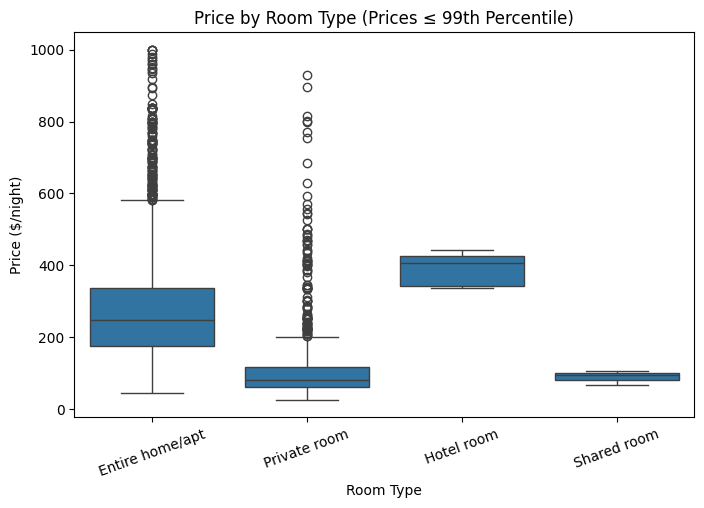

In [25]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=filtered, x="room_type", y="price")
plt.title("Price by Room Type (Prices ≤ 99th Percentile)")
plt.xlabel("Room Type")
plt.ylabel("Price ($/night)")
plt.xticks(rotation=20)
plt.show()
